In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/MLDL-Project/Code/Codebase_inUse"

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1qdeOmMzRTTZYag_nMfIYW1ptaZ_OpJwD/MLDL-Project/Code/Codebase_inUse


In [2]:
from model_t3 import *
from datasets.gtav import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
def plot_img(image, beta = None):
    plt.figure(figsize=(8, 4))
    plt.imshow(image.permute(1, 2, 0), cmap=cm.seismic)
    if beta == None:
        plt.title("Image")
    else:
        plt.title(f"Image || Beta: {beta}")

In [4]:
train_transforms = sstr.Compose([
                     #as seen in FedDrive
                sstr.ToTensor()

            ])

root = 'data/idda'
with open(os.path.join(root, 'train.json'), 'r') as f:
    all_data = json.load(f)

#Client and dataset extraction
client_id  = list(all_data.keys())[5]
dataset = IDDADataset(root=root, list_samples=all_data[client_id], transform=train_transforms,client_name=client_id)

In [5]:
#Loading the GTAV dataset
with open("data/GTAV+Cityscapes/data/GTA5/train.txt",'r') as f:
    list_samples = [line.rstrip('\n') for line in f]
gta_ds = GTAVDataset(root="data/GTAV+Cityscapes/data/GTA5",list_samples = list_samples,transform=train_transforms)


In [8]:
betas = [0.0001, 0.005, 0.001, 0.05, 0.01, 0.1, 0.2, 0.3]
#betas = [0, 0.00001, 0.3]

In [9]:
gta_ds.style_augment = None

index = 3
img_native,lbl_native = gta_ds[index]

plot_img(img_native)

for beta in betas:
    style_augment = StyleAugment(n_images_per_style = -1, L = beta)
    style_augment.add_style(dataset,name = client_id)
    gta_ds.style_augment = style_augment
    plot_img(gta_ds[index][0],beta=beta)

Output hidden; open in https://colab.research.google.com to view.

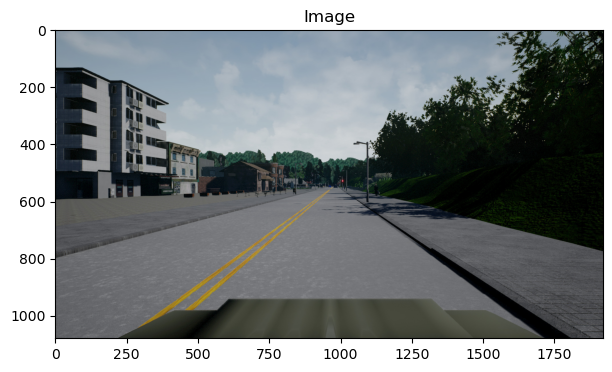

In [ ]:
plot_img(dataset[0][0])